In [5]:
%matplotlib inline

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms

#torchvision을 사용해 cifar 10을 불러오는 과정
#import torch : 신경망 구축 및 훈련을 위해 pytorch 라이브러리를 가져옴
#import torchvision : pytorch 패키지인 torchvision 라이브러리를 가져옴 
# -> mnist, cifar-10 등 인기있는 데이터 셋 등 사전 훈련된 모델이 포함됨
#import torchvision.transforms as transforms -> 입력 데이터에 적용할 수 있는
#공통 이미지 변환 셋을 제공하는 torchvision에서 변환 모듈을 가져온다;
#크기조정, 자르기, 뒤집기 및 정규화와 같은 작업이 포함되며 신경망 훈련 또는
#테스트를 위해 데이터를 준비하는데 사용할 수 있음

#torchvision 데이터셋의 출력은 [0,1] 범위를 갖는 이미지 -> [-1,1]의 범위로 정규화된 tensor로 변환

In [8]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [9]:
transform = transforms.Compose(
[transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#transforms.ToTensor() -> 입력 데이터를 신경망에서 처리할 수 있는 pytorch tensor로 변환
#[0,255] 범위에서 [0,1] 범위까지 픽셀 값의 크기를 조정
#transforms.Normalize() -> 평균(0.5,0.5,0.5)를 빼고 표준 편차(0.5,0.5,0.5)로 나누어
#입력 데이터를 정규화
#입력 데이터의 평균 및 단위 분산이 0이 되어 신경망의 성능과 안정성을 개선하는데 도움이 됨

#두개의 테스트 셋에 동일한 변환 파이프라인을 적용해 입력 데이터가 일관된 속성을 갖도록 보장

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train = True, download = True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True,num_workers = 2)

testset = torchvision.datasets.CIFAR10(root='./data', train = False, download = True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle = False, num_workers = 0)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#배치 크기를 4로 정의 : 각 반복에서 로드되고 처리될 이미지 수
#cifar10의 데이터 셋을 다운로드 하고 두 개의 데이터 셋(trainset / testset)을 생성
#trainset은 모델 학습에 사용, testset은 모델 성능 평가에 사용
#이미지를 tensor로 변환하고 픽셀값을 정규화하는 것을 포함하는 두 데이터셋에
#이전에 정의된 변환 파이프라인을 적용
#pytorch의 dataloader 클래스를 사용하여 두 데이터 셋에 대한 데이터 로더 생성
#trainloader 개체에 대해 shuffle 매개 변수를 true로 설정하면 훈련중에(?) 각 배치의 샘플 순서가 섞임
#모델 성능과 안정성을 개선하는데 도움이 됨
#cifar-10 데이터셋에 대한 클래스 목록 정의

100%|███████████████████████████████████████████████████████████████| 170498071/170498071 [00:19<00:00, 8873658.54it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [10]:
import matplotlib.pyplot as plt
import numpy as np

#데이터를 시각화하는데 필요한 라이브러리를 가져옴
#pyplot 모듈 -> 선 도표, 산점도, 히스토그램 및 기타 유형의 도표를 작성하기 위한 도구 제공
#numpy 라이브러리 -> 수치 계산을 위해 배열, 행렬 및 기타 수학적 개체 작업을 위한 도구 제공

In [11]:
#이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
#pytorch 텐서(이미지)를 입력으로 사용함
#이미지의 픽셀 값을 정규화 -> [-1,1] 범위의 픽셀 값이 matplotlib에서 이미지를 표시하기 위한
#예상 범위인 [0,1] 범위로 변환됨
#numpy배열을 변환하여 차원을 CHW -> HWC로 재정렬 (C:channel수, H:높이, W:너비)
#show() 함수를 사용하여 플롯 표시

In [12]:
#학습용 이미지를 무작위로 가져옴

detaiter = iter(trainloader)
images, labels = next(detaiter)

#iter() : trainloader 데이터 로더에 대한 반복자를 만든 후 next() 함수를 사용해
#반복자에서 첫 번재 데이터 배치를 가져옴

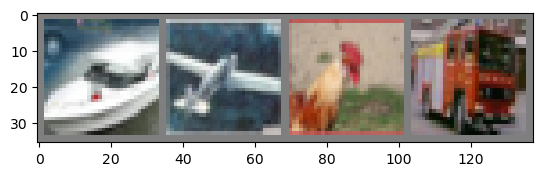

ship  plane bird  truck


In [13]:
#이미지 보이기
imshow(torchvision.utils.make_grid(images))
#정답 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

#grid() : 이미지의 텐서를 가져와 imshow()를 사용하여 표시할 수 있는 이미지 그리드를 생성하는 함수
#결과 그리드는 이미지 사이에 패딩이 있고 표시 영역에 맞게 크기가 조정됨
#패딩 : convolusion 후 아웃풋 이미지의 크기 유지 및 edge쪽 픽셀 정보를 더 잘 이용하기 위해 사용
#cifar-10 훈련셋의 첫 번째 데이터 배치를 시각적 및 텍스트로 표현
#기계학습모델을 교육하기 전에 데이터가 올바르게 로드되고 처리되고 있는지 확인하는데 사용가능

In [14]:
import torch.nn as nn
import torch.nn.functional as F

#nn은 신경망 모델을 구성하기 위한 미리 정의된 레이어 및 빌딩 블록 집합을 제공
#일반적으로 복잡한 신경망 아키텍처를 정의하는데 사용
#nn.functional은 사용자 지정 레이어를 정의하는 데 사용할 수 있는 일반적으로 사용되는
#활성화 함수 및 작업에 대한 기능 인터페이스 집합 제공
#학습 가능한 매개변수가 없는 사용자 지정 활성화 함수 및 기타 작업을 정의하는데 사용
#데이터 셋에 대한 훈련을 위한 신경망 아키텍처를 정의하는데 사용

In [15]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#기존에 1채널 이미지만 처리하도록 정의된 것을 3채널 이미지를 처리할 수 있도록 수정
#pytorch의 nn.Module 클래스를 사용하여 신경망 아키텍처 정의
#nn.Module - 신경망 모듈, 매개변수를 캡슐화하는 간편한 방법 -> gpu로 이동, 내보내기, 불러오기 등

#self.conv1, self.conv2 : 신경망(Net)은 두 개의 컨볼루션 레이어
#self.fc1, self.fc2 : 두 개의 완전히 연결된 레이어
#self.fc3 : 입력을 매핑하는 최종 출력 레이어로 구성

#init() : 계층을 만들고 초기화 하여 신경망의 아키텍처 정의
#forward() : 입력 데이터가 출력을 생성하기 위해 레이어를 통해 흐르는 방식을 지정하여
#신경망의 순방향 패스를 정의

#self.conv1(첫 번째 컨볼루션 계층): 3개의 입력채널, 6개의 출력 채널 및 5*5의 커널 크기
#MaxPool2d -> 커널 크기가 2*2인 최대 풀링 계층

#self.conv2(두 번째 컨볼루션 계층): 6개의 입력 채널, 16개의 출력 채널 및 5*5의 커널 크기

#self.fc1 및 self.fc2 -> 두번째 풀링 계층의 출력은 평면화되고 각각 120 및 84 출력 기능이 있는
#두 개의 완전히 연결된 계층을 통과

#최종 출력 레이어(self.fc3) -> cifar10 데이터셋의 10개 클래스에 해당하는 10개의 출력기능

#forward : 신경망의 순방향 전달을 구현 -> 입력텐서 x를 가져와 다음 순서로 신경망의 레이어를 통과
#컨볼루션 레이어1 -> 최대 풀링 레이어-> 컨볼루션 레이어2-> 최대 풀링 레이어-> 평탄화 ->
#완전 연결 레이어1-> ReLU 활성화 함수-> 완전히 연결된 레이어2 -> ReLU 활성화 함수 -> 출력 레이어

#최종 레이어의 출력은 순방향 패스의 출력으로 반환됨

In [16]:
net = Net()

#cifar-10 데이터 셋에 대한 훈련을 위한 신경망 아키텍처를 나타냄
#Net() 인스턴스를 생성하면 init 메서드에 정의된대로 적절한 매개변수를 사용해
#신경망의 계층 초기화 -> 새로 생성된 신경망 훈련 또는 추론에 사용할 수 있음

In [17]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#신경망 훈련에 사용할 손실함수와 최적화 알고리즘 정의
#nn.CrossEntropyLoss() -> 예측 레이블과 대상 레이블 간의 엔트로피 손실을 측정하는 기준을 만듬
#이 손실 함수는 다중 클래스 분류 문제에서 일반적으로 사용
#손실함수 : 얼마나 틀리는지를 알게 하는 함수 -> 최소값을 찾아가는 것이 최적화
#현재 네트워크에서 나오는 결과값과 기대했던 결과값의 차이

#optim.SGD() -> 모멘텀이 있는 확률적 경사하강법을 구현하는 옵티마이저 생성
#신경망 매개변수(net.prarmeters()), 학습률(lr=0.001), 모멘텀(momentum=0.9)를 입력으로 사용
#옵티마이저는 학습 중에 신경망의 매개변수를 업데이트 하기 위해
#매개변수에 대한 손실 함수의 기울기를 사용
#옵티마이저 : 손실함수의 최소값을 찾아가는 것을 수행하는 최적화 알고리즘
#확률적 경사하강법: 훈련 셋에서 랜덤하게 하나의 샘플을 선택해 가파른 경사를 조금 내려간 후
#훈련셋에서 랜덤하게 또 다른 샘플을 하나 선택해 경사를 조금 내려간다 -> 전체 샘플을 모두 사용하면
#이 과정을 반복함
#모멘텀: 경사하강법으로 이동할 때 관성을 부여하는 최적화 기법

In [18]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0): #입력을 받는다
        #데이터는 [입력, 레이블]목록
        inputs, labels = data 
        #매개변수(변화도) 기울기를 0으로 만듬
        optimizer.zero_grad()
        #출력 = net(입력)
        outputs = net(inputs)
        #손실 = 기준(출력, 레이블) -> 순전파 + 역전파 + 최적화를 한 후
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #통계 출력
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
            
print('Finished Training')

#trainloader에 의해 정의된 훈련 데이터 세트의 미니 배치를 반복
#enumerate() : 미니 배치를 반복하는데 사용
#각 미니 배치에 대해 입력 데이터와 레이블이 데이터 변수에서 추출됨
#신경망 매개변수의 변화도를 0으로 재설정하기 위해 zero_grad() 호출
#pytorch가 기본적으로 그래디언트를 누적하므로 이전 미니 배치의 그래디언트가 현재 미니배치에서
#사용되지 않도록 하기 때문에 필요
#입력데이터는 신경망을 통해 공급되어 예측된 출력을 얻음
#optimizer.step(): 이전에 지정된 계산된 기울기와 학습 속도 및 모멘텀을 기반으로
#신경망의 매개변수를 업데이트

#배치: 모델의 가중치를 한 번 업데이트시킬 때 사용되는 샘플들의 묶음을 의미
#에포크: 학습의 횟수
#미니배치: SGD와 배치를 섞은 것으로 전체 데이터를 N등분하여 각각의 학습 데이터를 배치 방식으로 학습

[1,  2000] loss: 2.161
[1,  4000] loss: 1.837
[1,  6000] loss: 1.647
[1,  8000] loss: 1.571
[1, 10000] loss: 1.518
[1, 12000] loss: 1.429
[2,  2000] loss: 1.378
[2,  4000] loss: 1.353
[2,  6000] loss: 1.328
[2,  8000] loss: 1.294
[2, 10000] loss: 1.273
[2, 12000] loss: 1.271
Finished Training


In [19]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

#훈련된 모델의 state_dict를 "cifar_net.pth"파일에 저장
#새 데이터에 대한 예측을 위해 훈련된 모델을 사용하기 위해 나중에 이 파일을 로드할 수 있음

In [20]:
dataiter = iter(testloader)
images, labels = next(dataiter)

#테스트 이미지와 해당 레이블 배치를 얻음
#이 이미지는 학습된 모델의 성능을 평가하는데 사용

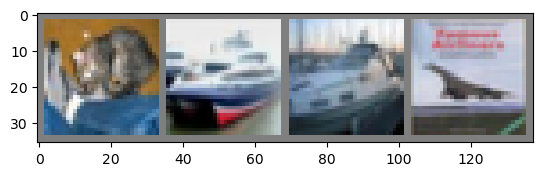

GroundTruth:  cat   ship  ship  plane


In [21]:
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

#실측 레이블과 함께 테스트 이미지 표시

In [22]:
net = Net()
net.load_state_dict(torch.load(PATH))

#저장된 상태에서 훈련된 모델을 다시 로드함
#이 모델을 사용하여 테스트 이미지를 예측할 수 있음

<All keys matched successfully>

In [23]:
outputs = net(images)

#로드된 모델을 통해 테스트 이미지를 통과해 예측을 얻음
#출력 텐서는 10개 클래스 각각에 대한 예측 점수 포함
#점수가 가장 높은 클래스가 해당 이미지에 대한 예측 클래스

In [24]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

#출력 텐서에서 최대값의 인덱스를 찾아 테스트 이미지에 대한 예측 클래스를 얻음
#join을 사용하여 예측된 클래스의 이름을 문자열로 연결함

Predicted:  cat   car   ship  ship 


In [25]:
correct = 0
total = 0

#학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요 없음
with torch.no_grad():
    for data in testloader:
        images, labels = data
        #신경망에 이미지를 통과시켜 출력을 계산
        outputs = net(images)
        #가장 높은 값을 갖는 클래스를 정답으로 선택
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

#10000개의 테스트 이미지에 대한 네트워크의 정확도는 올바르게 분류된 이미지의 수를
#테스트 셋의 총 이미지 수로 나누어 계산할 수 있음
#테스트셋을 반복하면서 업데이트한 올바른 전체 변수를 사용할 수 있음

Accuracy of the network on the 10000 test images: 54 %


In [26]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
#correct_pred: 각 클래스에 대한 올바른 예측 수
#total_pred: 총 예측 수를 추적하는 데 사용

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        #각 클래스 별로 올바른 예측 수를 모음
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
#testloader를 통해 반복 및 각 레이블 및 예측 쌍에 대한 correct_pred 및 total_pred 사전 업데이트

#각 분류별 정확도 출력
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 45.6 %
Accuracy for class: car   is 62.0 %
Accuracy for class: bird  is 30.0 %
Accuracy for class: cat   is 50.4 %
Accuracy for class: deer  is 47.7 %
Accuracy for class: dog   is 20.4 %
Accuracy for class: frog  is 82.9 %
Accuracy for class: horse is 57.9 %
Accuracy for class: ship  is 78.7 %
Accuracy for class: truck is 72.4 %


In [27]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

#device -> gpu 사용 가능 여부 확인
#딥러닝 모델 교육이 계산이 매우 많기 때문에 gpu를 사용하면 속도를 크게 높일 수 있으므로 유용

cuda:0


In [28]:
net.to(device)

#모델넷을 지정된 장치로 이동 -> gpu에서 처리해야 하는 대규모 모델 및 데이터 셋으로 작업할 때 유용

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [29]:
inputs, labels = data[0].to(device), data[1].to(device)

#gpu 사용 가능 여부에 따라 결정된 장치로 입력 및 레이블 텐서 이동

In [30]:
del dataiter